<a href="https://colab.research.google.com/github/notdedsec/EDA-Assessment/blob/main/EDA-Hepatitis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Importing and analyzing dataset.

In [146]:
data = pd.read_csv('sample_data/hepatitis_csv.csv')

In [147]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [138]:
data.tail()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
150,46.0,1,1,0,1,1,1,1,0,0,1,1,2,7.6,NaN,242.0,3.3,50.0,1,0.0
151,44.0,1,1,0,1,0,0,1,1,0,0,0,0,0.9,126.0,142.0,4.3,NaN,1,1.0
152,61.0,1,0,0,1,1,0,0,1,0,1,0,0,0.8,75.0,20.0,4.1,NaN,1,1.0
153,53.0,0,0,0,1,0,0,1,0,1,1,0,2,1.5,81.0,19.0,4.1,48.0,1,1.0
154,43.0,1,1,0,1,0,0,1,0,1,1,1,0,1.2,100.0,19.0,3.1,42.0,1,0.0


In [139]:
data.shape

(155, 20)

In [148]:
data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [149]:
data.columns

Index(['age', 'sex', 'steroid', 'antivirals', 'fatigue', 'malaise', 'anorexia',
       'liver_big', 'liver_firm', 'spleen_palpable', 'spiders', 'ascites',
       'varices', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin', 'protime',
       'histology', 'class'],
      dtype='object')

In [142]:
data.nunique()

age                49
sex                 2
steroid             3
antivirals          2
fatigue             3
malaise             3
anorexia            3
liver_big           3
liver_firm          3
spleen_palpable     3
spiders             3
ascites             3
varices             3
bilirubin          34
alk_phosphate      83
sgot               84
albumin            29
protime            44
histology           2
class               2
dtype: int64

In [150]:
data.isnull().sum()

age                 0
sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

Check for class imbalance.

In [151]:
replacements = {
  'male': 1,
  'female': 0,
  'yes': 1,
  'die': 0,
  'live': 1,
  'no': 0,
  '?': np.nan
}

data.replace(replacements, inplace=True)

In [152]:
data = data.astype(float)

In [153]:
total = data.shape[0]
total_live = (np.sum(data['class'] == 1)/total)*100
total_dead = (np.sum(data['class'] == 0)/total)*100
print("Living patients:", round(total_live,2),"%")
print("Dead patients:", round(total_dead,2),"%")

Living patients: 79.35 %
Dead patients: 20.65 %


Generating statistics.

In [155]:
numerical_vars = ['age', 'bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot']
data[numerical_vars].describe()

,age,bilirubin,protime,albumin,alk_phosphate,sgot
count,155.000000,149.000000,88.000000,139.000000,126.000000,151.00000
mean,41.200000,1.427517,61.852273,3.817266,105.325397,85.89404
std,12.565878,1.212149,22.875244,0.651523,51.508109,89.65089
min,7.000000,0.300000,0.000000,2.100000,26.000000,14.00000
25%,32.000000,0.700000,46.000000,3.400000,74.250000,31.50000
50%,39.000000,1.000000,61.000000,4.000000,85.000000,58.00000
75%,50.000000,1.500000,76.250000,4.200000,132.250000,100.50000
max,78.000000,8.000000,100.000000,6.400000,295.000000,648.00000


In [156]:
categorical_vars = ['sex' , 'steroid', 'antivirals', 'fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palpable','spiders','ascites','varices', 'histology']
data[categorical_vars].apply(pd.Series.value_counts)

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,histology
0.0,139,76,131,54,93,122,25,84,120,99,130,132,85
1.0,16,78,24,100,61,32,120,60,30,51,20,18,70


Dropping NaN values and analyzing some specefic variables.

In [157]:
analysis = data.dropna()
check_vars = ['albumin', 'anorexia','alk_phosphate', 'ascites', 'bilirubin', 'protime', 'sgot', 'class']
analysis = analysis[check_vars]
analysis.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,4.0,0.0,95.0,0.0,0.9,75.0,28.0,1.0
10,4.4,0.0,78.0,0.0,1.3,85.0,30.0,1.0
11,3.7,0.0,59.0,0.0,1.0,54.0,249.0,1.0
12,3.9,0.0,81.0,0.0,0.9,52.0,60.0,1.0
13,4.9,0.0,57.0,0.0,2.2,78.0,144.0,1.0


Plotting histograms.

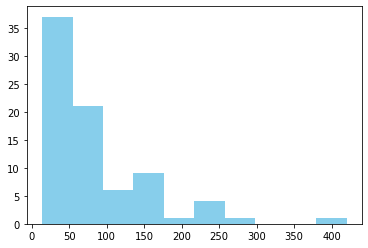

In [158]:
plt.hist(analysis['sgot'], color = "skyblue", lw=0);

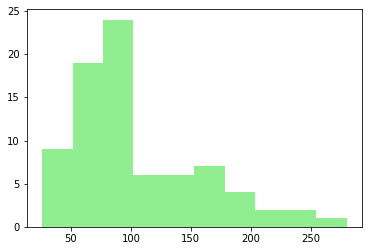

In [159]:
plt.hist(analysis['alk_phosphate'], color = "lightgreen", lw=0);

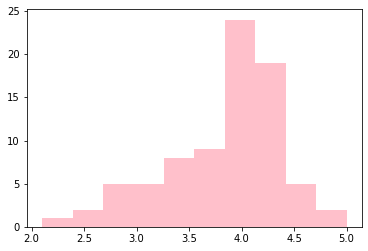

In [160]:
plt.hist(analysis['albumin'], color = "pink", lw=0);


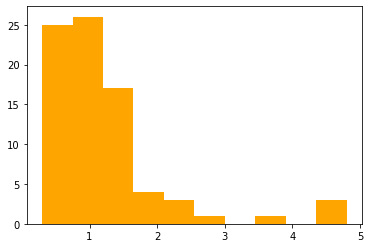

In [161]:
plt.hist(analysis['bilirubin'], color = "orange", lw=0);

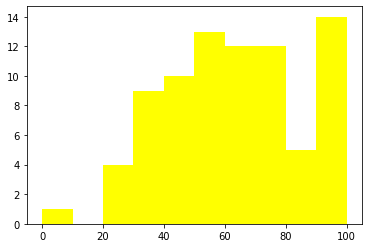

In [162]:
plt.hist(analysis['protime'], color = "yellow", lw=0);

Some of the variables show a degree of skewness, to fix them we do the following:

In [163]:
analysis[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']] = analysis[['albumin', 'alk_phosphate', 'bilirubin', 'sgot']].applymap(np.log)
analysis.head()

,albumin,anorexia,alk_phosphate,ascites,bilirubin,protime,sgot,class
5,1.386294,0.0,4.553877,0.0,-0.105361,75.0,3.332205,1.0
10,1.481605,0.0,4.356709,0.0,0.262364,85.0,3.401197,1.0
11,1.308333,0.0,4.077537,0.0,0.000000,54.0,5.517453,1.0
12,1.360977,0.0,4.394449,0.0,-0.105361,52.0,4.094345,1.0
13,1.589235,0.0,4.043051,0.0,0.788457,78.0,4.969813,1.0


Visualizing relationships between different numerical variables using pairplot.

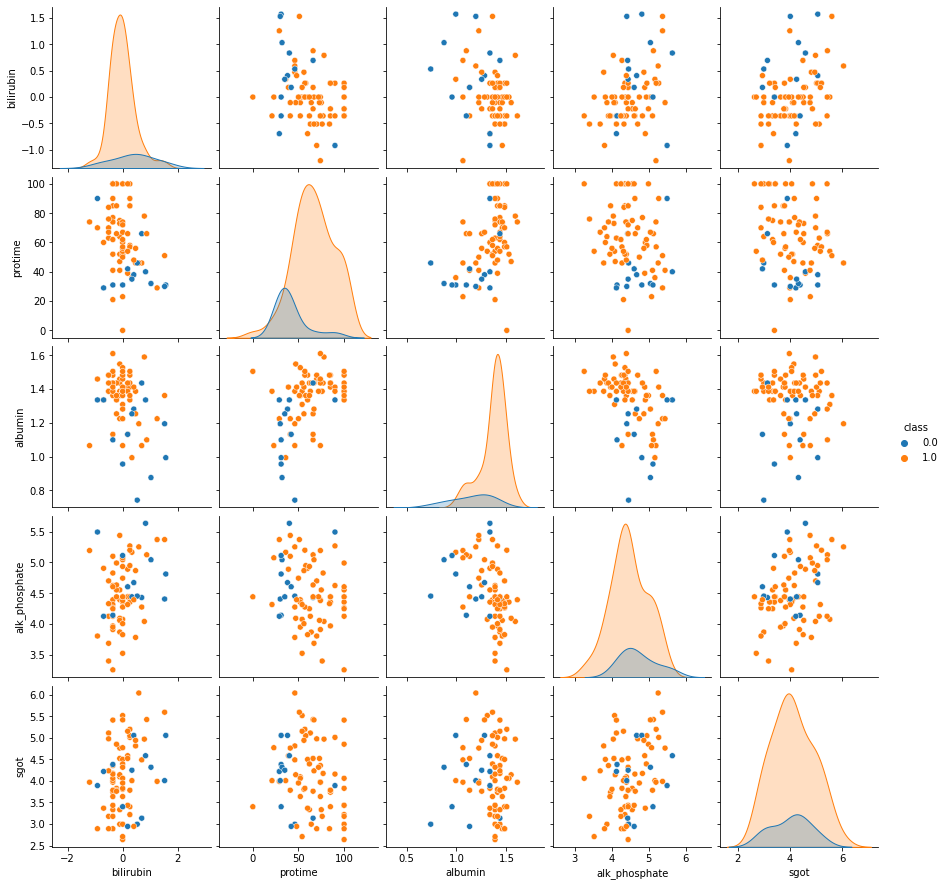

In [164]:
p = sns.pairplot(analysis, hue = 'class', kind = 'scatter',
  x_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'], 
  y_vars = ['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'])
p.fig.get_children();

From these plots we can conclude that:

- Skewness is fixed.
- Patients tend to differentiate according to class.
- No perfect linear relationship is obesrved between plotted variables.
- Some of them show a trend for interaction.

We will study them further with a stripplot.

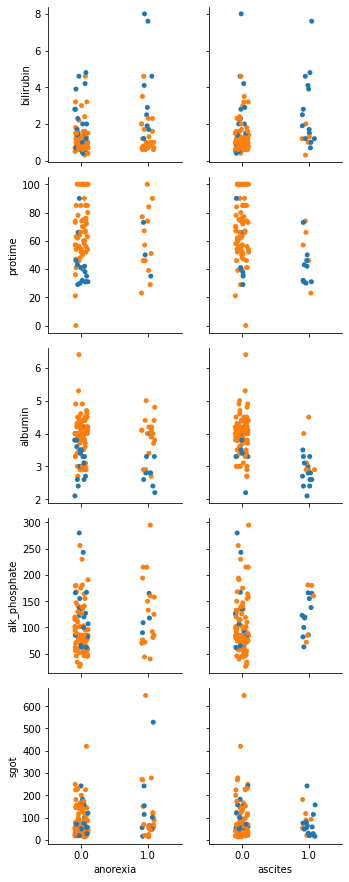

In [165]:
graph = sns.PairGrid(data, hue = 'class',
  x_vars=['anorexia', 'ascites'],
  y_vars=['bilirubin', 'protime', 'albumin', 'alk_phosphate', 'sgot'])
graph.map(sns.stripplot, s=5);

Not much difference from previous plots.

Plotting heatmap to check correation between parameters.

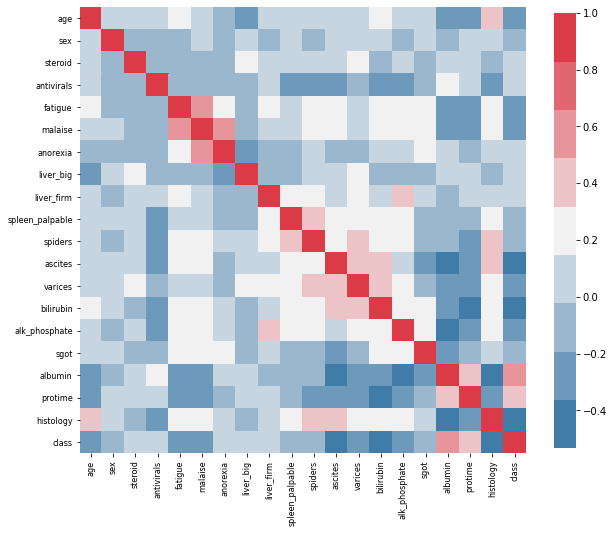

In [166]:
data[categorical_vars] = data[categorical_vars].apply(lambda x : pd.factorize(x)[0])
corr = data.dropna().corr(method = 'pearson')
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(240, 10, n=9)
sns.heatmap(corr, cmap=cmap, cbar_kws={"shrink": .8}, square=True);
plt.yticks(size= 8, rotation=0) 
plt.xticks(size = 8, rotation = 90);

Since most of the variables have a very low correlation coefficient, we can say that there's no strong correlation.

This concludes the EDA of our dataset, now we can apply the appropriate machine learning algorithms on it.